In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [22]:
from MomentEquations import MomentsDiff_Eq_fn, Get_Init_fn, solve_Moments_fn


In [23]:
# sc = n_foxO/au_foxO
sc = 0.01870914785101721


In [24]:
# par_low_7 = np.load('/blue/pdixit/hodaakl/Data/Low_Pars_NoDimerazationModel_0301.npy')
# par_high_7  = np.load('/blue/pdixit/hodaakl/Data/high_Pars_NoDimerazationModel_0301.npy')

In [25]:
# print(par_low_7)
# print(par_high_7)

In [26]:
par_dict = {'par_name': ['k1', 'k2','k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12']
            , 'low_lim_log':np.array([ -0.2,-4.1 , -1.5, -4.8, -.5, -1.5,-2, -0.25,-5, -2.3, -2.7, -3.5])
            , 'high_lim_log': np.array([ 0.2, -3.1, -0.5,-2.8, .5, -.5, -.5, 1.25, -4, -1.8 , -2.3, -2.8])}
k = (par_dict['low_lim_log'] + par_dict['high_lim_log'])/2

# k = np.random.rand(12)
IGF=125
tend = 60*60*3
Dynamical_Solution, LastP_Solution = solve_Moments_fn(k, IGF, tend)

In [27]:
10**k

array([1.00000000e+00, 2.51188643e-04, 1.00000000e-01, 1.58489319e-04,
       1.00000000e+00, 1.00000000e-01, 5.62341325e-02, 3.16227766e+00,
       3.16227766e-05, 8.91250938e-03, 3.16227766e-03, 7.07945784e-04])

In [28]:
## 
# init_species = Get_Init_fn

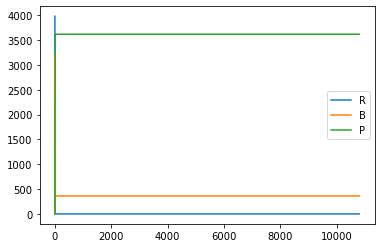

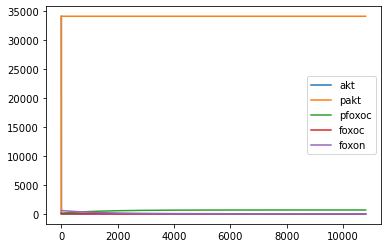

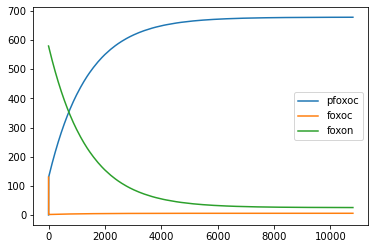

In [29]:
## foxOn doe not change~ # i think K1 would need to change 
Spec_list = [ 'R', 'B', 'P', 'akt', 'pakt', 'pfoxoc', 'foxoc', 'foxon']
t = Dynamical_Solution.t
y = Dynamical_Solution.y[7,:]
#normalize the abudance and see what it looks like
for i in range(3):
#     if i >5:
    y = Dynamical_Solution.y[i,:]
    plt.plot(t,y, label = Spec_list[i])

plt.legend()
plt.show()

for i in range(3,8):
    y = Dynamical_Solution.y[i,:]
    plt.plot(t,y, label = Spec_list[i])

plt.legend()
plt.show()

for i in range(5,8):
    y = Dynamical_Solution.y[i,:]
    plt.plot(t,y, label = Spec_list[i])

plt.legend()
plt.show()

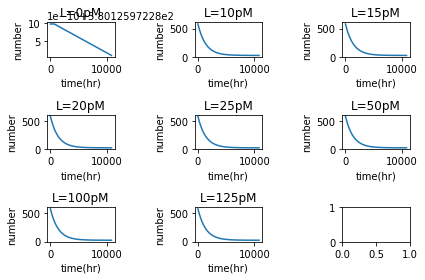

In [32]:
# solve the equations for 0,10,15,20,25,50,250 and plot the nuclear foxO mean 
L_arr = [0,10,15,20,25,50,100,125,250]
tend = 60*60*3
k = (par_dict['low_lim_log'] + par_dict['high_lim_log'])/2
figure, axs = plt.subplots(3,3)
ii = 0 ; jj = -1;
for i in range(len(L_arr)-1):
    jj +=1 
    if jj == 3: 
        ii+=1
        jj = 0
    IGF = L_arr[i]
    Dynamical_Solution, LastP_Solution = solve_Moments_fn(k, IGF, tend)
    t = Dynamical_Solution.t
    # extract the foxOn solution
    thr = t
    y = Dynamical_Solution.y[7,:]
    axs[ii,jj].plot(thr,y)

    
#     plt.legend()
    # plt.title('Model mean FoxOn')
    axs[ii,jj].set_xlabel('time(hr)')
    axs[ii,jj].set_ylabel('number')
    axs[ii,jj].set_title(f'L={IGF}pM')

plt.tight_layout()
plt.show()

    

# Load the experimental data and convert it using the scaling factor, get the 

Text(0, 0.5, 'Abundance')

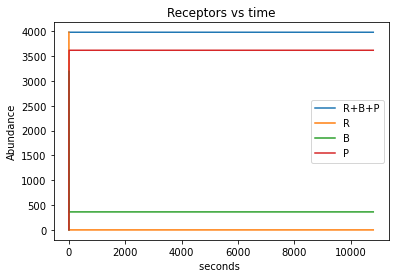

In [9]:
plt.plot(t, Dynamical_Solution.y[0,:] + Dynamical_Solution.y[1,:] + Dynamical_Solution.y[2,:], label = 'R+B+P')
for i in range(3):
    plt.plot(t, Dynamical_Solution.y[i,:], label = Spec_list[i])

plt.legend()
plt.title('Receptors vs time')
plt.xlabel('seconds ')
plt.ylabel('Abundance')

In [ ]:
import numpy as np
np.log10(0.00064*10**3)

In [ ]:
for i in range(4):
    plt.plot(t, Dynamical_Solution.y[i,:])
    plt.title(Spec_list[i])
    plt.show()

In [ ]:
## check if we can load the differential equations 
tspan = np.array([0,10])
k = np.random.rand(12)
çIGF=0
sol_dyn = solve_ivp(Moments_fn, tspan, z0, method = 'LSODA', args=(k,IGF))
sol = sol_dyn.y[:,-1]
sol.shape